# Scraping Top Repositories for Topics on GitHub

Intro:

1. Introduction about web scraping
2. Introduction about GitHub and the problem statement
3. Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)

Here are the steps we'll follow:

We're going to scrape https://github.com/topics
We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
For each topic, we'll get the repositories in the topic from the topic page
For each repository, we'll grab the repo name, username, stars and repo URL
For each topic we'll create a CSV file in the following format:
Repo Name,Username,Stars,Repo URL


# Scrape the list of topics from Github

Explain how you'll do it:

1. use requests to downlaod the page
2. user BS4 to parse and extract information
3. convert to a Pandas dataframe


In [1]:
# Importing necessary libraries: 

import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import Image

In [2]:
# Let's write a function to download the url page

def get_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f'Failed to load {page_url}')
    page_contents = response.text
    page_doc = BeautifulSoup(page_contents,'html.parser')
    return page_doc

In [3]:
# Now using our own written function, let's download our page from url

page_doc = get_page("https://github.com/topics")

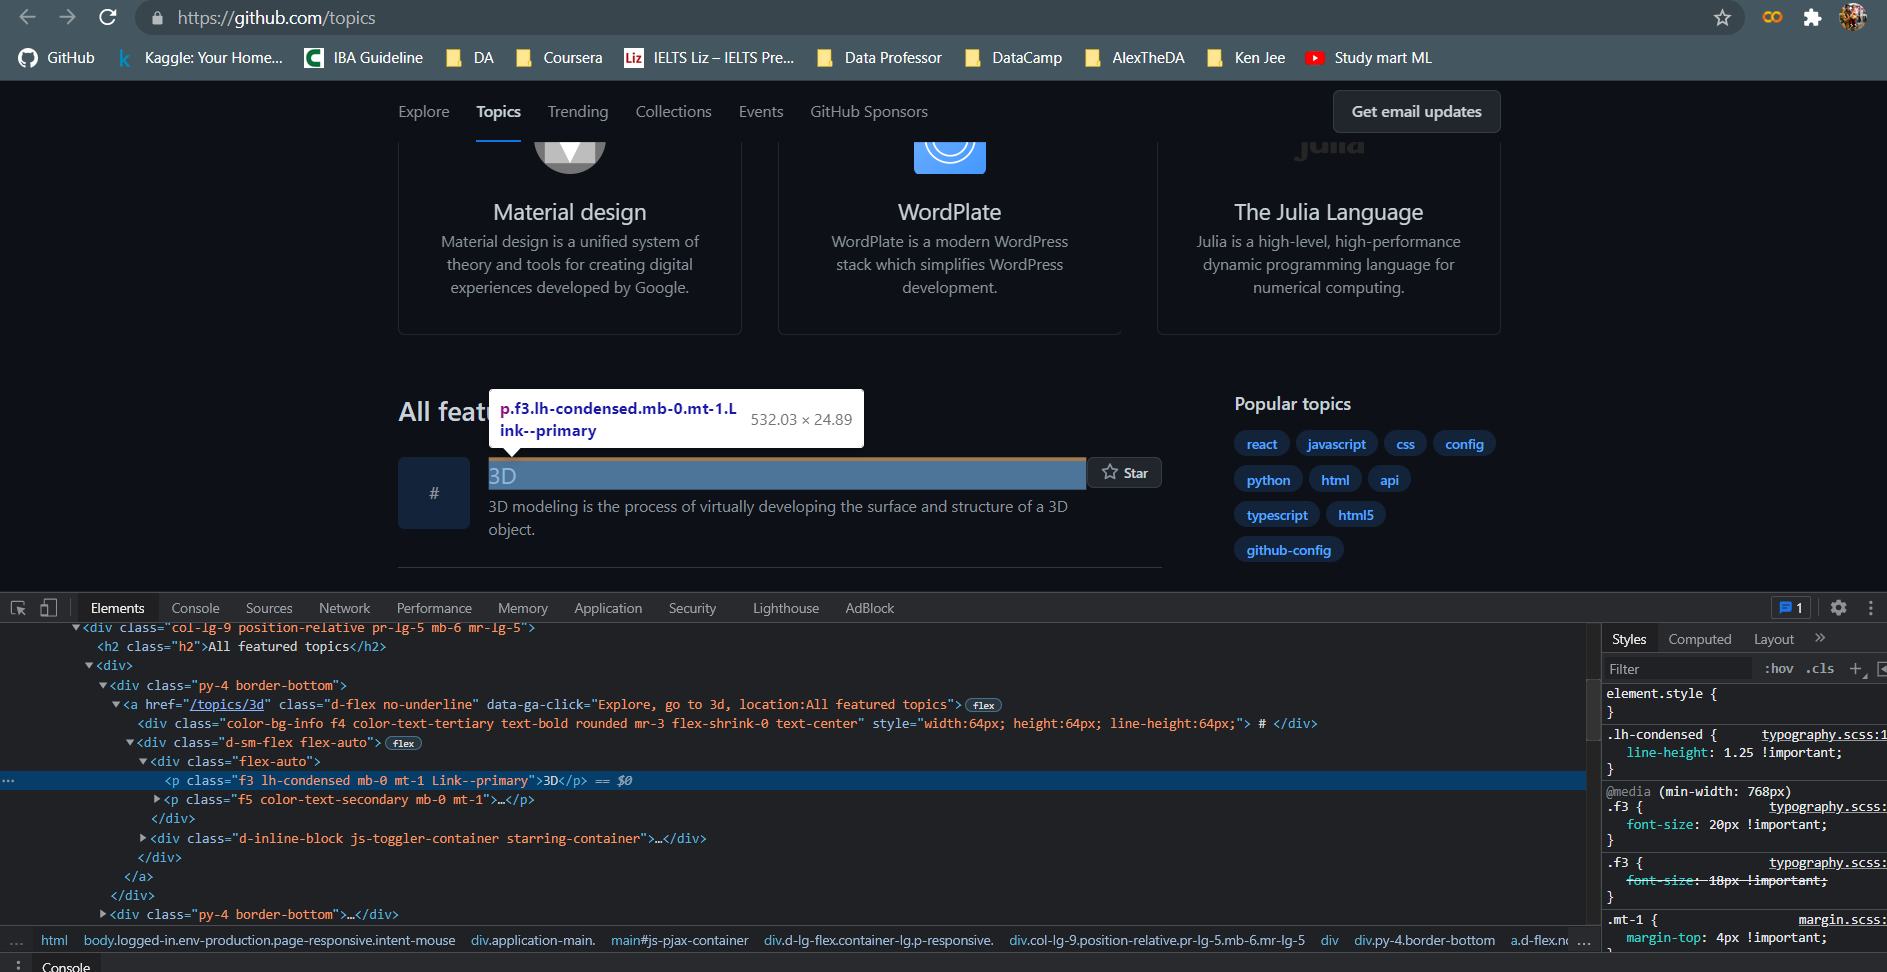

In [33]:
Image(filename=r'C:\Users\A S U S\Pictures\Screenshots\Screenshot (57).png')

Here, we've to use this tag to fetch the topic title i.e the selected '3D' (title of topic)

In [4]:
## Let's write a function to fetch the topic title of the page

def topic_title(page_doc):
    title_tag= 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_titles= page_doc.find_all('p',class_= title_tag)
    Title = []
    for i in topic_titles:
        Title.append(i.text)
    return Title


In [34]:
# Fetch all topic titles

Topic_Title = topic_title(page_doc)

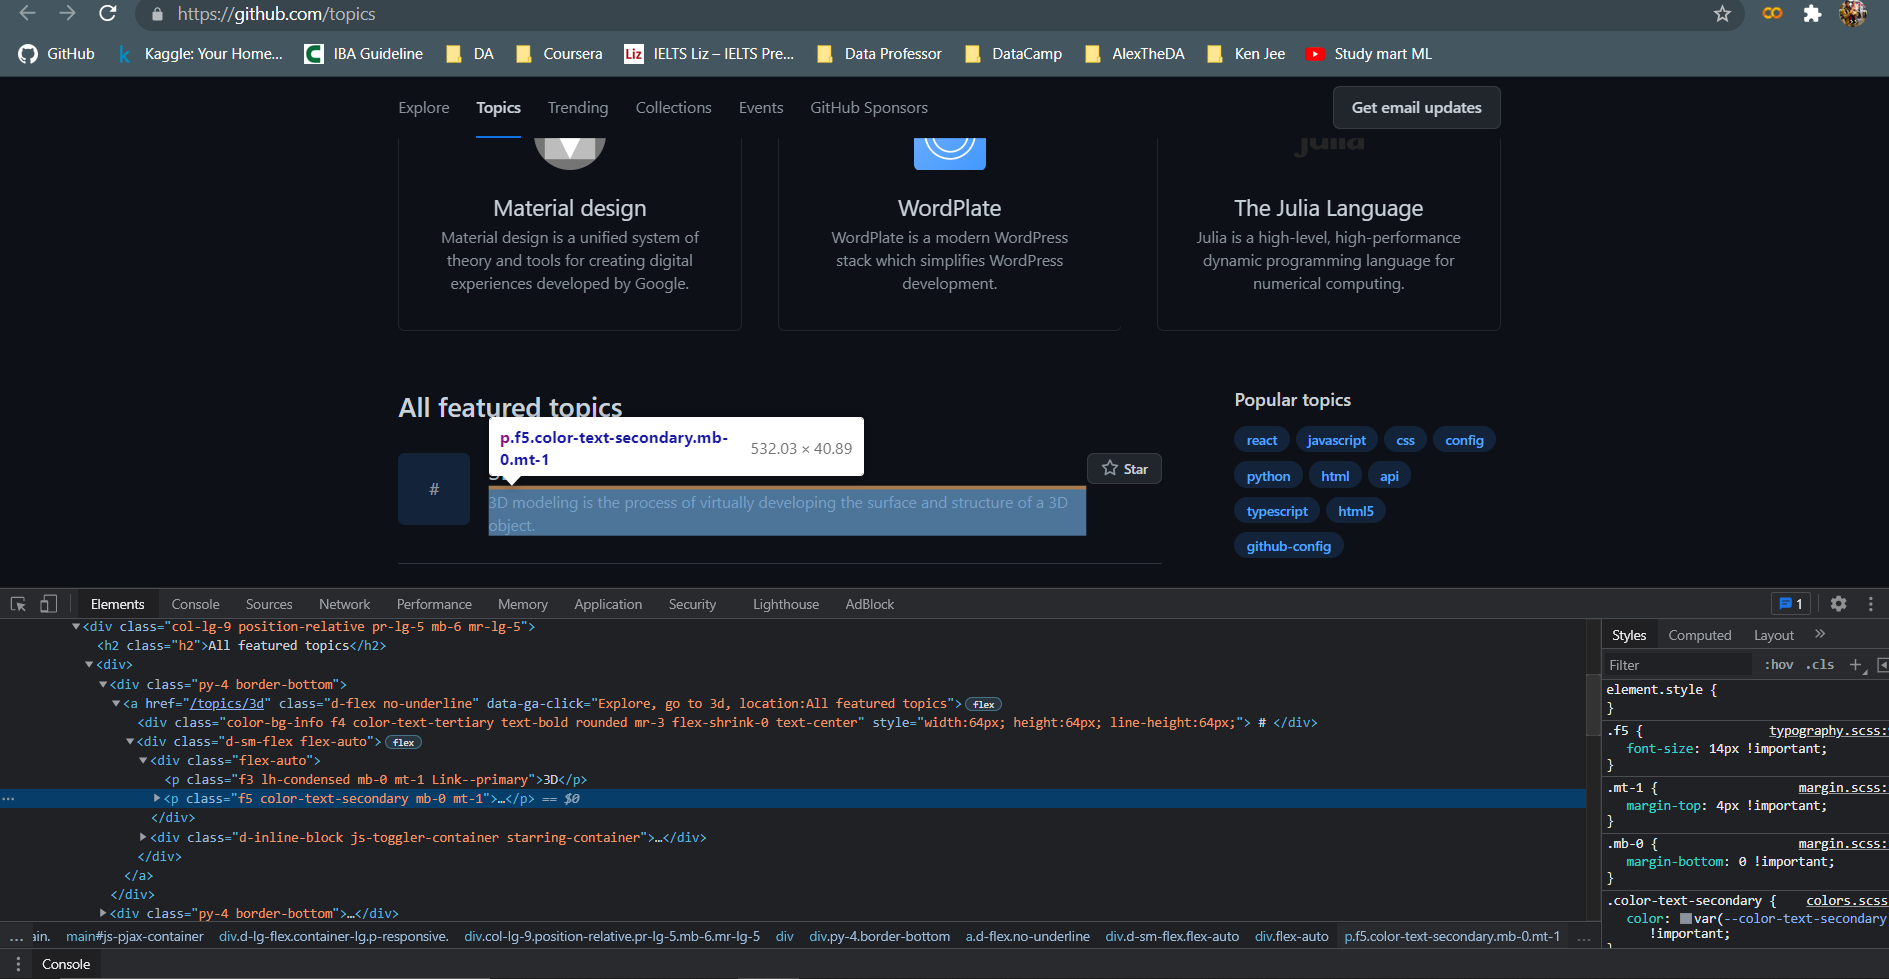

In [36]:
Image(filename=r'C:\Users\A S U S\Pictures\Screenshots\Screenshot (58).png')

Here, we've to use this tag to fetch the topic description i.e the selected part

In [6]:
## Let's write a function to fetch the topic title of the page

def topic_desc(page_doc):
    desc_tag= 'f5 color-text-secondary mb-0 mt-1'
    topic_desc= page_doc.find_all('p',class_= desc_tag)
    Description = []
    for i in topic_desc:
        Description.append(i.text.strip())
    return Description

In [35]:
# Fetch all topic details

Topic_Description = topic_desc(page_doc)

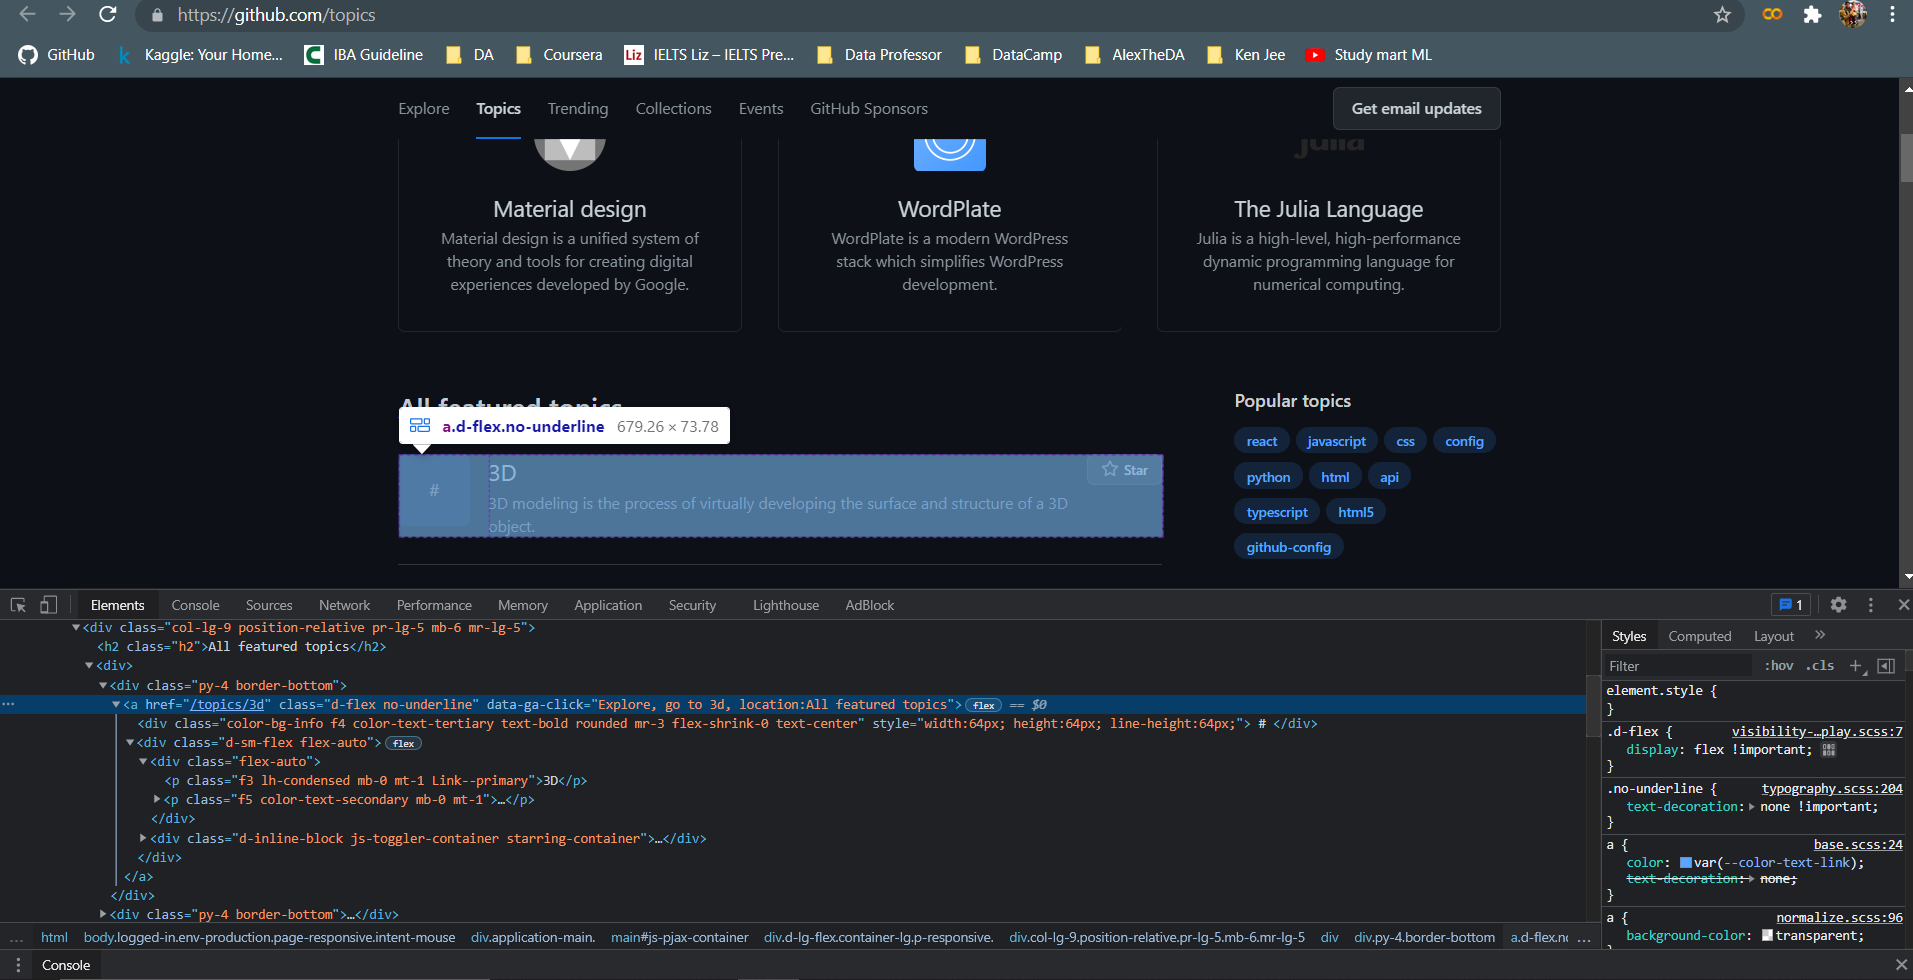

In [37]:
Image(filename=r'C:\Users\A S U S\Pictures\Screenshots\Screenshot (59).png')

Here, we've to use this tag to fetch the topic url.

In [42]:
## Let's write a function to fetch the topic url of the page

def topic_url(page_doc):
    url_tag= 'd-flex no-underline'
    topic_url= page_doc.find_all('a',class_= url_tag)
    base_url = 'http://github.com' 
    url = []
    for i in topic_url:
        url.append(base_url + i['href'])
    return url

In [43]:
# Fetch all topic urls

Topic_URL = topic_url(page_doc)

In [41]:
# let's merge our all the lists to create a dataframe

Topics_df = pd.DataFrame(list(zip(Topic_Title,Topic_Description,Topic_URL)),columns=['Title','Description','URL'])
Topics_df

,Title,Description,URL
0,3D,3D modeling is the process of virtually develo...,http://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,http://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,http://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,http://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,http://github.com/topics/android
5,Angular,Angular is an open source web application plat...,http://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,http://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,http://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,http://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,http://github.com/topics/aspnet


In [11]:
# Saving data in a CSV format

Topics_df.to_csv(r'C:\Users\A S U S\Desktop\DS\Portfolio Project\Web scrapping\Topics.csv',index=None)

# Gathering Information out of a topic page

In [12]:
specific_topic_URL = 'https://github.com/topics/3d'
r = requests.get(specific_topic_URL)
specific_topic_contents = r.text
specific_topic_doc = BeautifulSoup(specific_topic_contents,'html.parser')

In [13]:
specific_topic_doc.find_all('h1',class_='h1')[0].text.strip()

'3D'

### Let's say, We want to scrap the page and collect the username,reponame,repourl,stars from 3D topic.

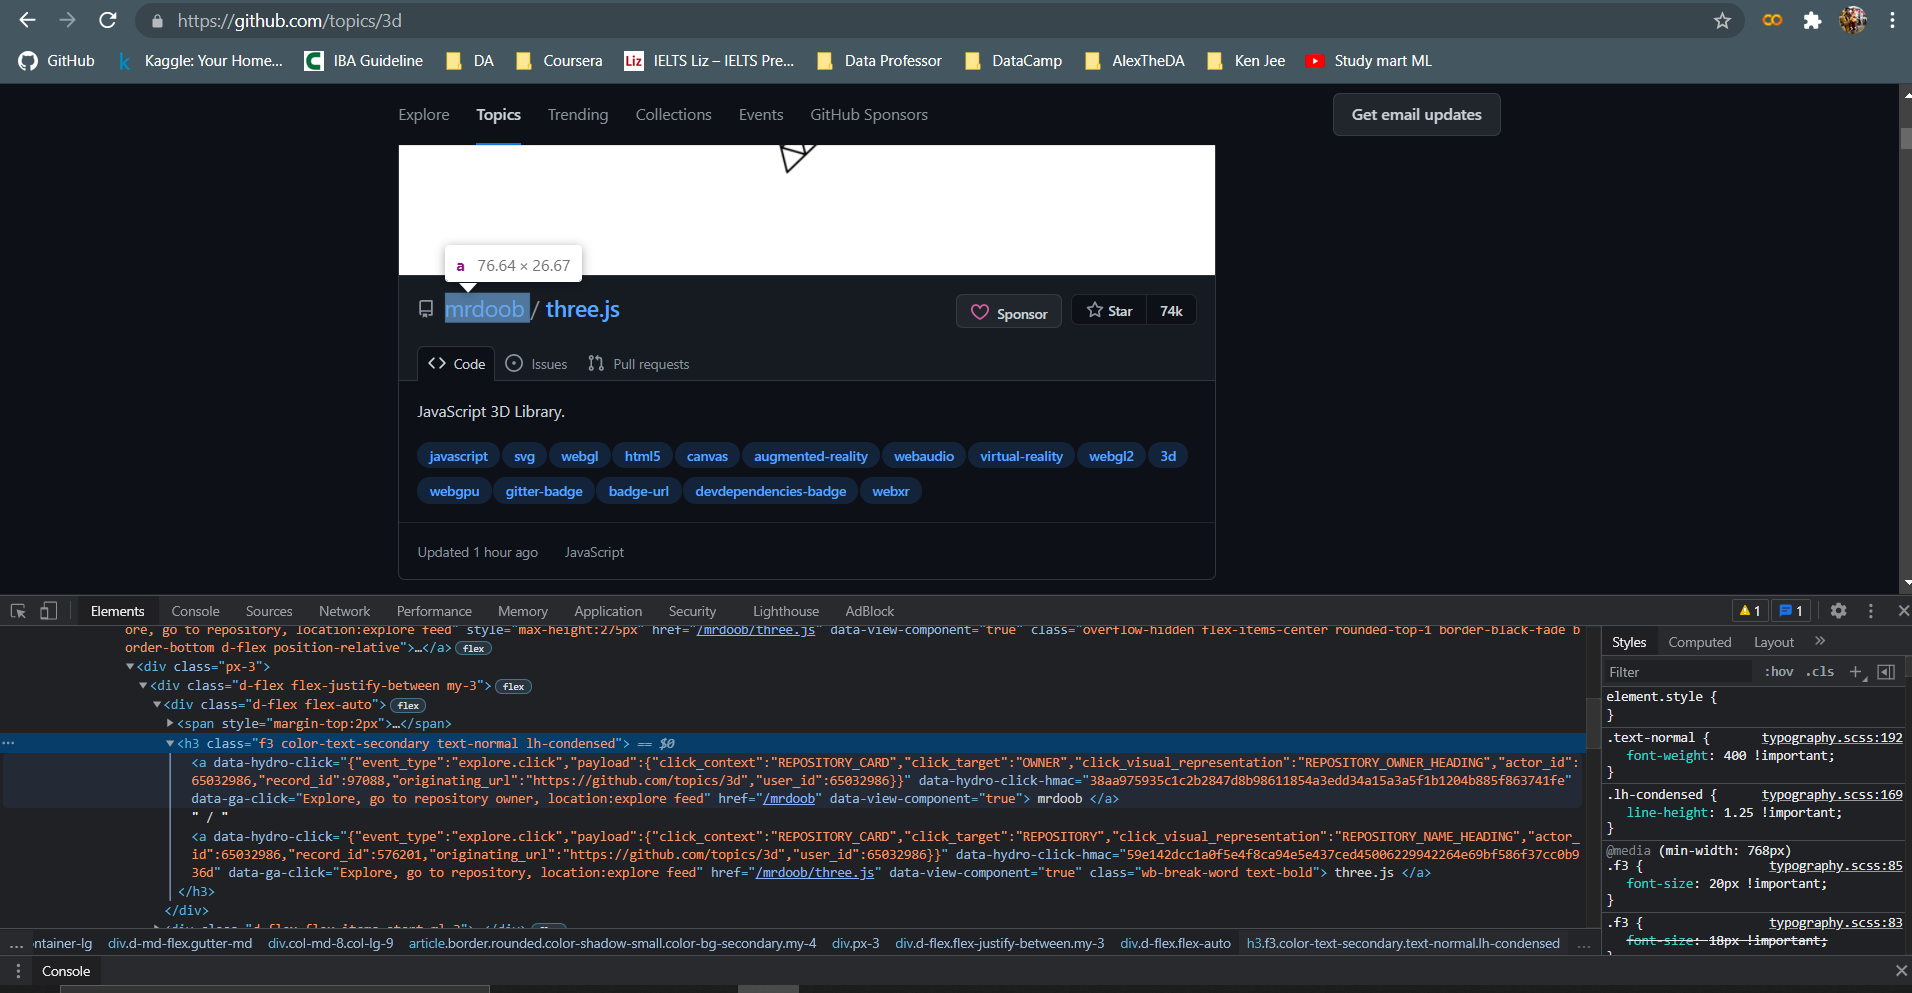

In [44]:
Image(filename=r'C:\Users\A S U S\Pictures\Screenshots\Screenshot (60).png')

we've to use this tag from html to collect the username and reponame of github profile.

In [14]:
# Write a function to fetch username from a specific topic

def get_username(doc,tag,selector):
    username_tags = doc.find_all(tag,class_=selector)
    username = []
    for i in username_tags:
        username.append(i.find_all('a')[0].text.strip())
    return username

In [15]:
# Fetch the username of 3D topic 
topic_3D_username = get_username(specific_topic_doc,'h3','f3 color-text-secondary text-normal lh-condensed')

In [16]:
# Write a function to fetch reponame from a specific topic

def get_reponame(doc,tag,selector):
    reponame_tags = doc.find_all(tag,class_=selector)
    reponame = []
    for i in reponame_tags:
        reponame.append(i.find_all('a')[1].text.strip())
    return reponame

In [17]:
# Fetch the reponame of 3D topic 

topic_3D_reponame = get_reponame(specific_topic_doc,'h3','f3 color-text-secondary text-normal lh-condensed')

In [18]:
# Write a function to fetch repourl from a specific topic

def get_repourl(doc,tag,selector):
    repourl_tags = doc.find_all(tag,class_=selector)
    base_url = 'https://github.com'
    repourl = []
    for i in repourl_tags:
        repourl.append(base_url + i.find_all('a')[1]['href'])
    return repourl

In [19]:
# Fetch the repourl of 3D topic 

topic_3D_repourl = get_repourl(specific_topic_doc,'h3','f3 color-text-secondary text-normal lh-condensed')

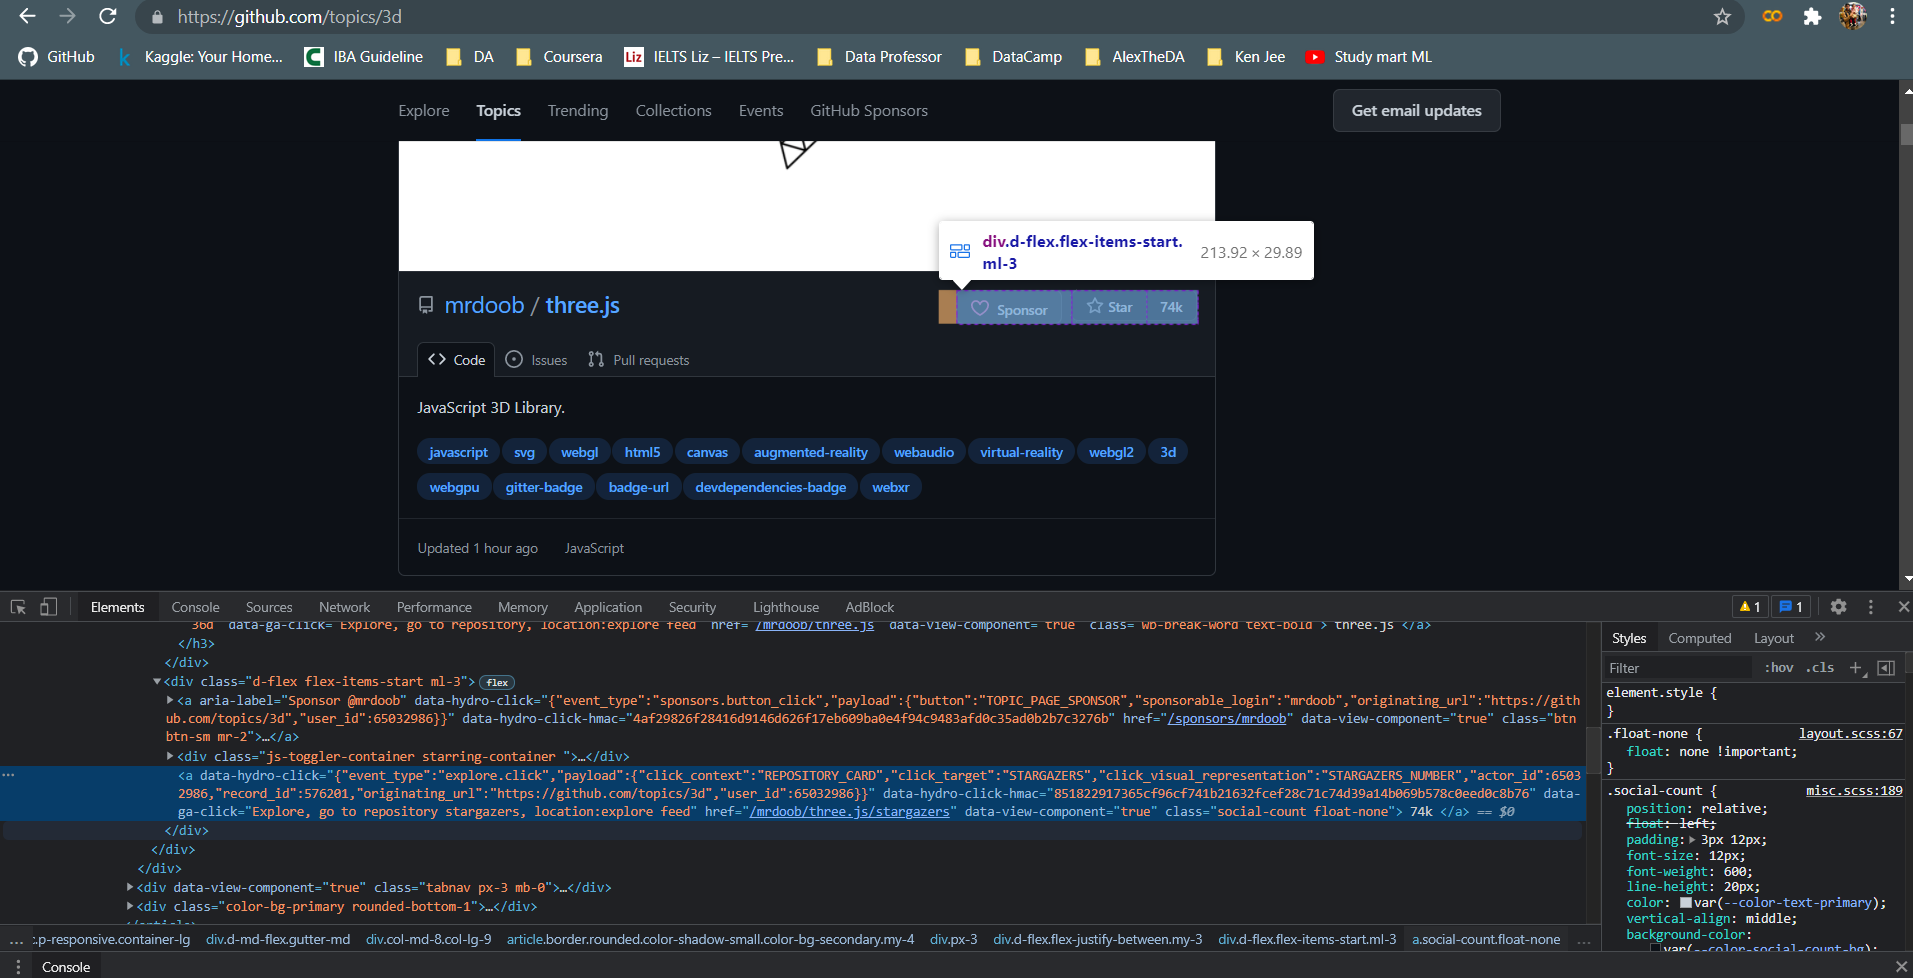

In [45]:
Image(filename=r'C:\Users\A S U S\Pictures\Screenshots\Screenshot (61).png')

from this tag,we can easily fetch the stars count i.e the '74k'

In [47]:
# Write a function to fetch stars from a specific topic

def get_stars(doc,tag,selector):
    stars_tags = doc.find_all(tag,class_=selector)
    stars = []
    for i in stars_tags:
        stars.append(i.text.strip())
    return stars

In [49]:
# Fetch the stars of 3D topic 
topic_3D_stars = get_stars(specific_topic_doc,'a','social-count float-none')

In [50]:
# Create a Dataframe for Specific topic username,reponame,repourl,stars

topic_3D = pd.DataFrame({'User_Name':topic_3D_username,'Repo_Name':topic_3D_reponame,'Repo_URL':topic_3D_repourl,'Stars':topic_3D_stars})

In [24]:
# scrap any topic using this function

def scrap_topics_repos(URL,h_tag,h_selector,a_tag,a_selector):
    r = requests.get(URL)
    contents = r.text
    doc = BeautifulSoup(contents,'html.parser')
    username_tags = doc.find_all(h_tag,class_=h_selector)
    reponame_tags = doc.find_all(h_tag,class_=h_selector)
    repourl_tags = doc.find_all(h_tag,class_=h_selector)
    stars_tags = doc.find_all(a_tag,class_=a_selector)
    base_url = 'https://github.com'
    username = []
    reponame = []
    repourl = []
    stars = []
    for i in username_tags:
        username.append(i.find_all('a')[0].text.strip())
    for i in reponame_tags:
        reponame.append(i.find_all('a')[1].text.strip())
    for i in repourl_tags:
        repourl.append(base_url + i.find_all('a')[1]['href'])
    for i in stars_tags:
        stars.append(i.text.strip())
    df = pd.DataFrame({'User_Name':username,'Repo_Name':reponame,'Repo_URL':repourl,'Stars':stars})
    return df
    

# Function for gathering all username,reponame,repourl and stars from each and every github topics.

In [25]:
# scrap all the data from each and every topic at once

def get_topic_page(page_url):
    if requests.get(page_url).status_code != 200:
        raise Exception (f'Failed to load page {url}')
    page_url_response = requests.get(page_url)
    page_url_doc= BeautifulSoup(page_url_response.text,'html.parser')
    link_selector= 'd-flex no-underline'
    topic_link_tags= page_url_doc.find_all('a',class_=link_selector)
    username = []
    repo_name = []
    stars= []
    base_url = 'https://github.com'
    repo_url = []
    df_list = []
    final_df = pd.DataFrame(columns=['username' , 'repo_name', 'repo_url', 'stars'])
    for tag in topic_link_tags:
        topic_url=[] 
        base_url = 'http://github.com'
        topic_url.append(base_url + tag['href'])
        for url in topic_url:
            response = requests.get(url)
            page_contents = response.text
            doc= BeautifulSoup(page_contents,'html.parser')
            selector = 'f3 color-text-secondary text-normal lh-condensed'
            repo_tags= doc.find_all('h3',class_=selector)
            stars_tag = doc.find_all('a',class_='social-count float-none')
            
            for tag in repo_tags:
                username.append(tag.find_all('a')[0].text.strip())
                repo_name.append(tag.find_all('a')[1].text.strip())
                repo_url.append(base_url + tag.find_all('a')[1]['href'])
            for tag in stars_tag:
                stars.append(tag.text.strip())
        repo_data_dict = {'username':username , 'repo_name':repo_name , 'repo_url':repo_url , 'stars':stars}
        df = pd.DataFrame(repo_data_dict)
    if df not in df_list:
        df_list.append(df)
    else:
         df_list
    for df in df_list:
        final_df = final_df.append(df)
    return final_df

In [26]:
github_all_topic_df = get_topic_page('https://github.com/topics')
github_all_topic_df

,username,repo_name,repo_url,stars
0,mrdoob,three.js,http://github.com/mrdoob/three.js,74k
1,libgdx,libgdx,http://github.com/libgdx/libgdx,18.9k
2,pmndrs,react-three-fiber,http://github.com/pmndrs/react-three-fiber,14.9k
3,BabylonJS,Babylon.js,http://github.com/BabylonJS/Babylon.js,14.8k
4,aframevr,aframe,http://github.com/aframevr/aframe,13k
...,...,...,...,...
895,compiler-explorer,compiler-explorer,http://github.com/compiler-explorer/compiler-e...,9.3k
896,hmemcpy,milewski-ctfp-pdf,http://github.com/hmemcpy/milewski-ctfp-pdf,8.7k
897,codota,TabNine,http://github.com/codota/TabNine,8.6k
898,nasa,fprime,http://github.com/nasa/fprime,8.4k


In [28]:
github_all_topic_df.to_csv(r'C:\Users\A S U S\Desktop\DS\Portfolio Project\Web scrapping\github_all_topics.csv',index=None)